In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('customer_experience_data.csv')
df

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,Female,Rural,12,4,5,37,11.853828,8,Churned,0,0,0
996,997,64,Male,Rural,5,4,11,5,25.124461,5,Retained,1,0,1
997,998,62,Female,Rural,6,1,5,28,17.616643,2,Retained,0,0,1
998,999,35,Male,Rural,11,5,4,8,17.006671,9,Retained,1,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [3]:
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


In [4]:
df.describe(include='object')

,Gender,Location,Retention_Status
count,1000,1000,1000
unique,2,3,2
top,Male,Urban,Retained
freq,524,344,694


In [11]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Location,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0


Aşağıdaki tabloda tüm sayısal değişkenlerin ortalama, standart sapma, min-maksimum gibi istatiksel özet değerleri görülmektedir.

In [14]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Customer_ID'])

statistical_summary = pd.DataFrame({
    "Mean": df.mean(numeric_only=True),
    "Median": df.median(numeric_only=True),
    "Std Dev": df[numeric_columns].std(),
    "Min": df[numeric_columns].min(),
    "Max": df[numeric_columns].max(),
    "25%": df[numeric_columns].quantile(0.25),
    "75%": df[numeric_columns].quantile(0.75)
}).round(2)
statistical_summary

,Mean,Median,Std Dev,Min,Max,25%,75%
Age,43.82,44.00,14.99,18.00,69.00,31.00,56.00
Customer_ID,500.50,500.50,NaN,NaN,NaN,NaN,NaN
Feedback_Score,2.98,3.00,1.42,1.00,5.00,2.00,4.00
Gender_Encoded,0.52,1.00,0.50,0.00,1.00,0.00,1.00
Location_Encoded,1.03,1.00,0.81,0.00,2.00,0.00,2.00
Num_Interactions,7.54,8.00,4.02,1.00,14.00,4.00,11.00
Products_Purchased,10.42,11.00,5.35,1.00,19.00,6.00,15.00
Products_Viewed,27.37,27.50,12.94,5.00,49.00,17.00,38.00
Retention_Status_Encoded,0.69,1.00,0.46,0.00,1.00,0.00,1.00
Satisfaction_Score,5.54,6.00,2.90,1.00,10.00,3.00,8.00


In [25]:
# Eksik değer sayısı ve yüzdesi
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

# Sadece eksik değer içeren sütunlar
missing_data = pd.DataFrame({
    "Eksik Değer Sayısı": missing_counts,
    "Yüzde (%)": missing_percentages.round(2)
})

missing_data = missing_data[missing_data["Eksik Değer Sayısı"] > 0]

# Sonuçları yazdır
if missing_data.empty:
    print("Veri setinde eksik değer bulunmamaktadır.")
else:
    print(" Eksik değer içeren sütunlar:")
    print(missing_data)



Veri setinde eksik değer bulunmamaktadır.


Bu veri setinde eksik değer bulunmamaktadır. Dolayısıyla imputasyon gerekmemektedir.

In [20]:
import pandas as pd

# Sayısal sütunların seçimi
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('Customer_ID', errors='ignore')

# IQR yöntemiyle aykırı değer analizi
outlier_summary = {}

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_summary[column] = {
        "Aykırı Değer Sayısı": outliers.shape[0],
        "Aykırı Değer Oranı (%)": round((outliers.shape[0] / len(df)) * 100, 2)
    }


outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)



                          Aykırı Değer Sayısı  Aykırı Değer Oranı (%)
Age                                       0.0                     0.0
Num_Interactions                          0.0                     0.0
Feedback_Score                            0.0                     0.0
Products_Purchased                        0.0                     0.0
Products_Viewed                           0.0                     0.0
Time_Spent_on_Site                        0.0                     0.0
Satisfaction_Score                        0.0                     0.0
Gender_Encoded                            0.0                     0.0
Location_Encoded                          0.0                     0.0
Retention_Status_Encoded                  0.0                     0.0


Aykırı değer tespiti sonucunda ise hiçbir değişkende aykırı değer bulunmamıştır.

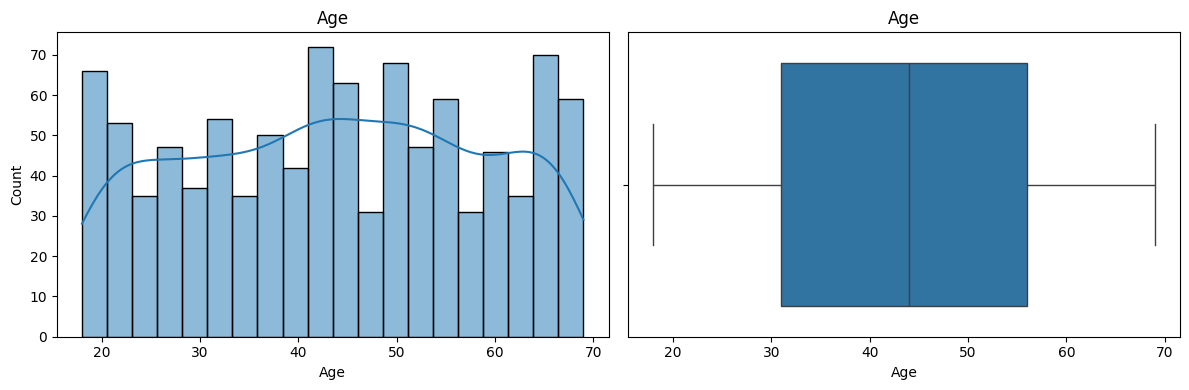

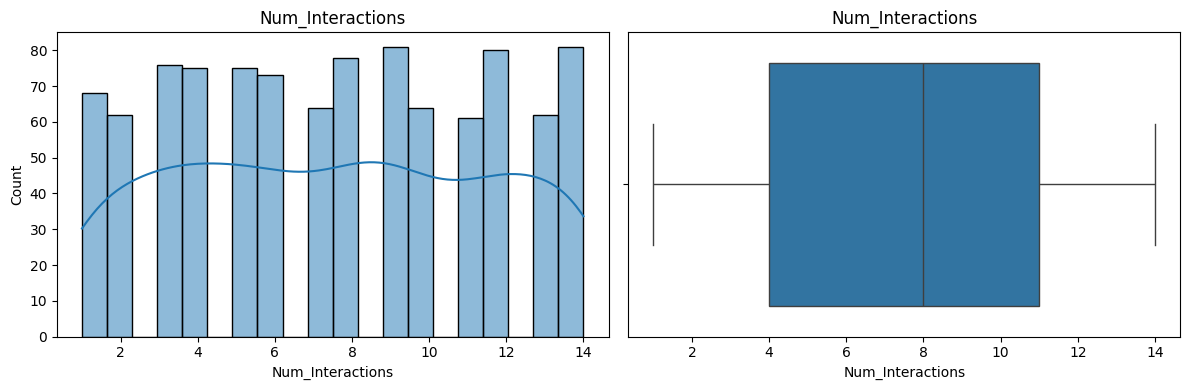

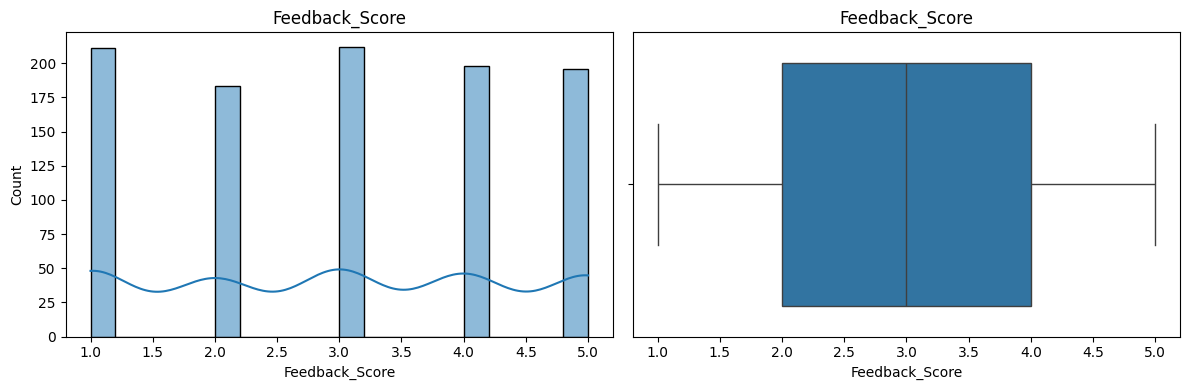

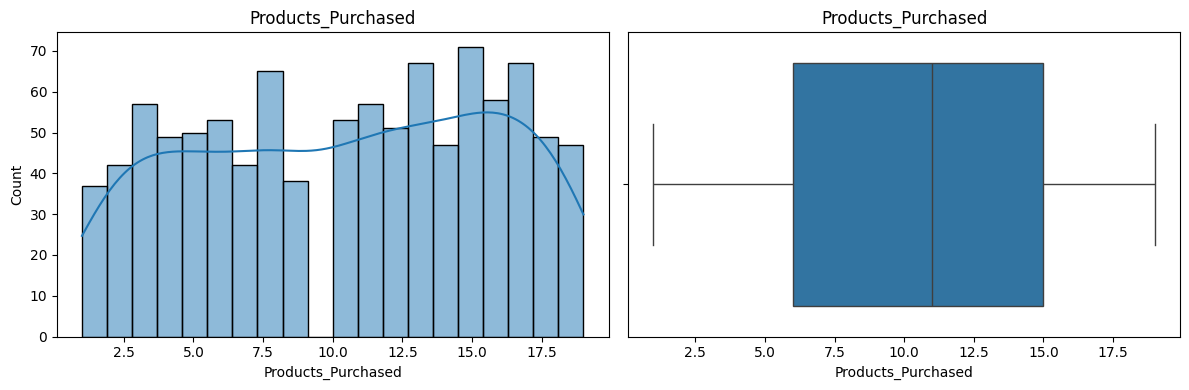

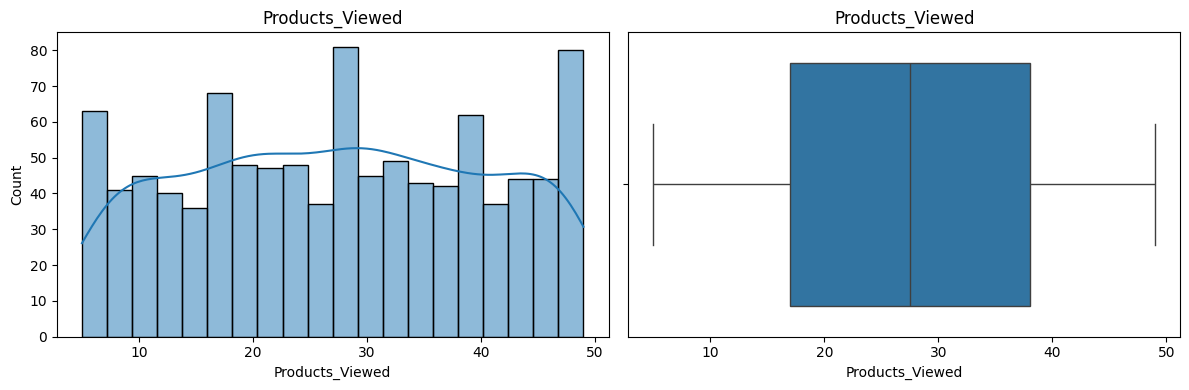

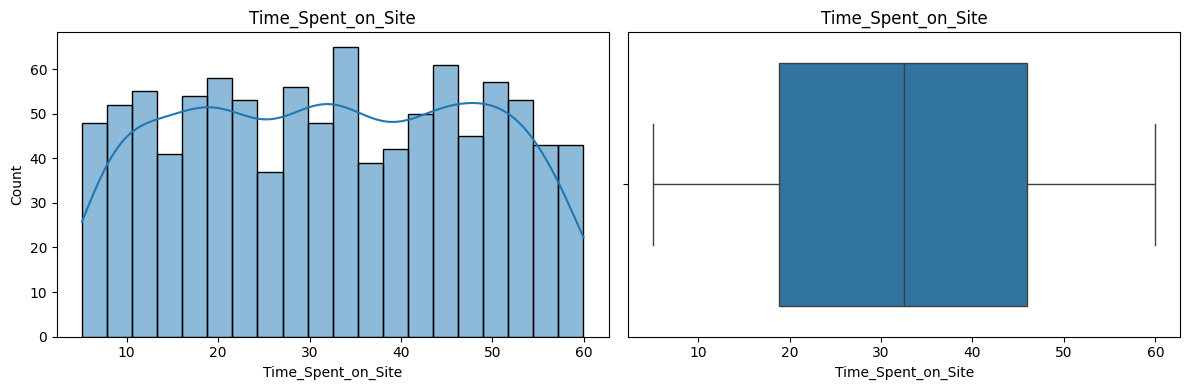

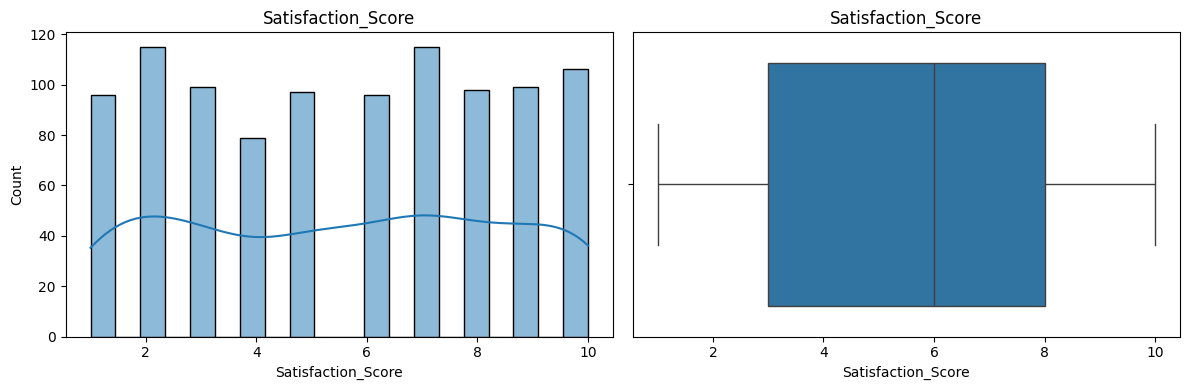

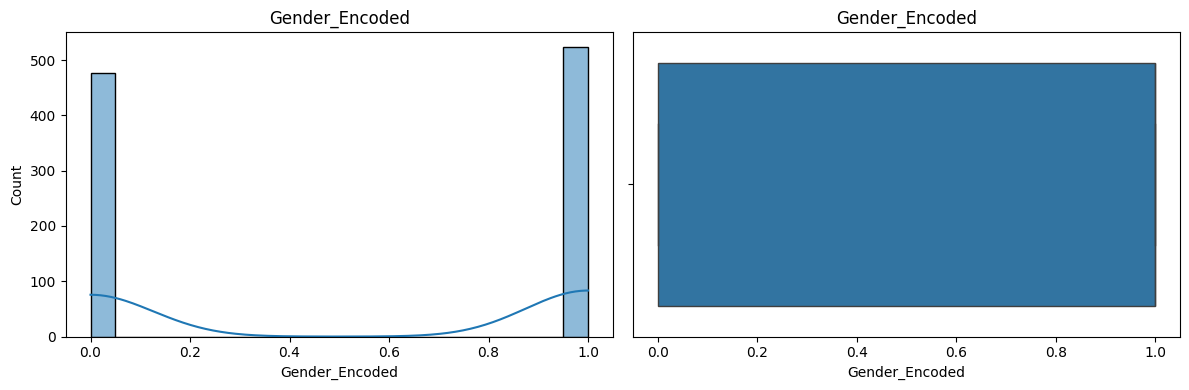

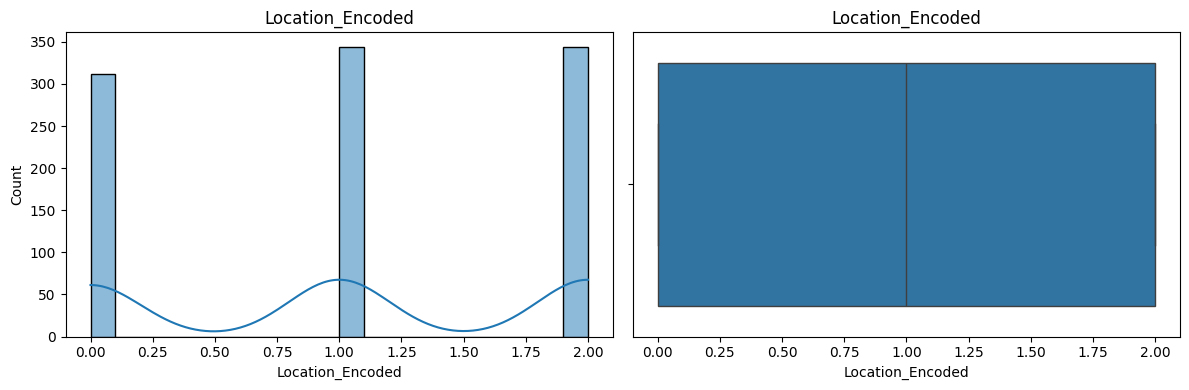

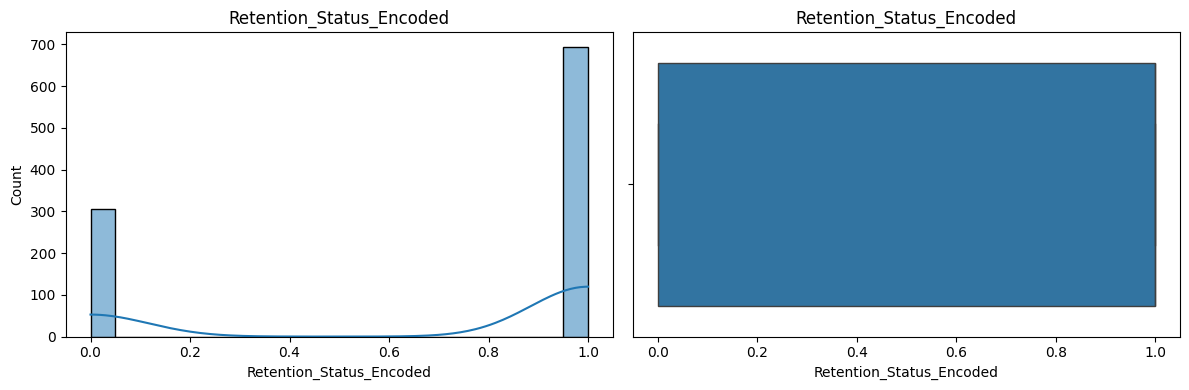

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal sütunlar
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('Customer_ID', errors='ignore')

# Her sayısal sütun için histogram ve boxplot
for column in numeric_columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'{column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'{column}')

    plt.tight_layout()
    plt.show()


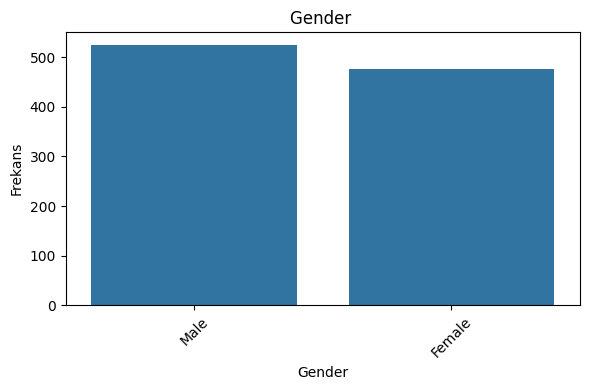

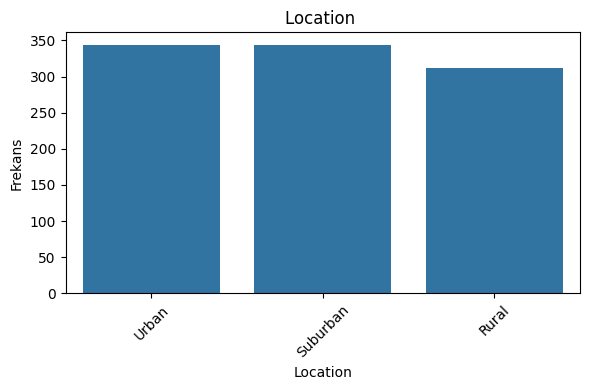

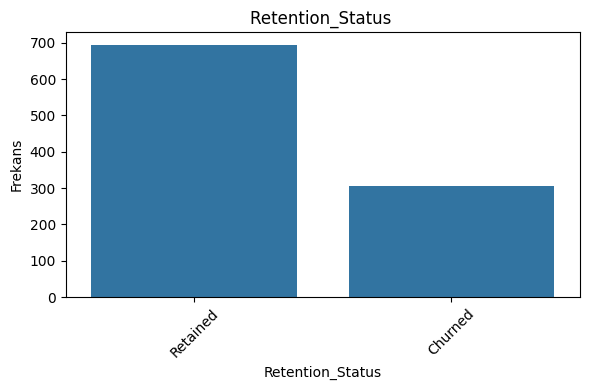

In [23]:
# Kategorik değişkenler
categorical_columns = df.select_dtypes(include='object').columns

# Her kategorik değişken için bar plot
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'{column} ')
    plt.xlabel(column)
    plt.ylabel("Frekans")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
